# Introduction to the TiLearn Library

TiLearn /taɪˈlɜrn/ is a combination of “Time” and “Machine Learning.” The library was built with the initial goal of automating the process of evaluating job weights ($w_j$) and improving the branching process (Learning to Branch) through machine learning methods.

The source code has been uploaded to GitHub, and the link is provided below.

GitHub link: [https://github.com/Bancie/TiLearn](https://github.com/Bancie/TiLearn)

The library has also been published on PyPI and can be easily downloaded and used.

Link: [https://pypi.org/project/TiLearn/](https://pypi.org/project/TiLearn/)

Additionally, the document site is designed to provide usage guides, instructions on how to run the library, and how it works.

Documentation link: [https://bancie.github.io/TiLearn/](https://bancie.github.io/TiLearn/)

The library currently supports the following features:

- A function for running the EDD algorithm.

- A function for running the WSPT algorithm.

- A function for solving the problem $1||\sum C_j$.

- A function for solving the problem $1||\sum w_j C_j$.

- A function for solving the problem $1|prec|\sum C_j$.

- A function for solving the problem $1|prec|\sum w_j C_j$.

- A function for handling a mixture of both $1|prec|\sum w_j C_j$ and $1||\sum w_j C_j$ problems.

Detailed guides on how to use these functions, including parameters and the meaning of each parameter, will be updated on the [documentation site](https://bancie.github.io/TiLearn/).

To use the library, it can be installed with the following command

In [1]:
%pip install tilearn

Note: you may need to restart the kernel to use updated packages.


Some supporting libraries for analysis

In [2]:
%pip install pandas
%pip install ipython
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Declare the main library

In [3]:
import tilearn as tl
from tilearn import _plat as pl

Some supporting libraries for data analysis

In [4]:
import csv
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Running Illustrative Data Using TiLearn

Suppose we need to process the following three lists

- List 1:

In [5]:
list1 = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/data/list1.csv' 
display(pd.read_csv(list1))

,Name,p,r,d,w
0,Job 1,4,0,100,0.65
1,Job 2,1,0,100,0.84
2,Job 3,3,0,100,0.46
3,Job 4,3,0,100,0.79
4,Job 5,1,0,100,0.17
5,Job 6,3,0,100,0.50
6,Job 7,4,0,100,0.95
7,Job 8,2,0,100,0.14
8,Job 9,5,0,100,0.52
9,Job 10,2,0,100,0.40


- List 2:

In [6]:
list2 = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/data/list2.csv'
display(pd.read_csv(list2))

,Name,p,r,d,w
0,Job 16,4,0,100,0.70
1,Job 17,3,0,100,0.95
2,Job 18,4,0,100,0.49
3,Job 19,1,0,100,0.13
4,Job 20,5,0,100,0.94
5,Job 21,1,0,100,0.57
6,Job 22,4,0,100,0.47


- List 3:

In [7]:
list3 = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/data/list3.csv'
display(pd.read_csv(list3))

,Name,p,r,d,w
0,Job 23,4,0,100,0.24
1,Job 24,1,0,100,0.54
2,Job 25,2,0,100,0.81
3,Job 26,2,0,100,0.41
4,Job 27,5,0,100,0.22
5,Job 28,2,0,100,0.29
6,Job 29,5,0,100,0.65
7,Job 30,4,0,100,0.69


In List 1, the jobs are independent and have no precedence, meaning they follow the structure of $1||\sum w_j C_j$. However, Lists 2 and 3 follow a structure that includes precedence constraints, $1|prec|\sum w_j C_j$.

The folder structure is set up as follows

```txt
tilearn/
├── main.py
└── data/
    ├── backup/
    ├── list1.csv
    ├── list2.csv
    └── list3.csv
```

Define the data paths

In [8]:
original = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/data'
backup = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/data/backup'

Select the problem type for each list by setting ``prec`` as follows:
    
- ``prec=0`` for problems that do not require job precedence.

- ``prec=1`` for problems that require job precedence.

In [9]:
lists = [
    pl.List(backup, file_path=list1, prec=0),
    pl.List(backup, file_path=list2, prec=1),
    pl.List(backup, file_path=list3, prec=1),
]

Run the program with the following command

In [10]:
schedule = tl.optimal_list(lists, original, backup)
print(schedule)

[['Job 14', 1.0, 0, 100, 0.9, 0.9], ['Job 2', 1.0, 0, 100, 0.84, 0.84], ['Job 12', 1.0, 0, 100, 0.39, 0.39], ['Job 13', 2.0, 0, 100, 0.57, 0.285], ['Job 4', 3.0, 0, 100, 0.79, 0.26333333333333336], ['Job 7', 4.0, 0, 100, 0.95, 0.2375], ['Job 16', 4.0, 0, 100, 0.7, 0.175], ['Job 17', 3.0, 0, 100, 0.95, 0.2357142857142857], ['Job 23', 4.0, 0, 100, 0.24, 0.06], ['Job 24', 1.0, 0, 100, 0.54, 0.156], ['Job 25', 2.0, 0, 100, 0.81, 0.22714285714285715], ['Job 15', 1.0, 0, 100, 0.22, 0.22], ['Job 26', 2.0, 0, 100, 0.41, 0.205], ['Job 10', 2.0, 0, 100, 0.4, 0.2], ['Job 18', 4.0, 0, 100, 0.49, 0.1225], ['Job 19', 1.0, 0, 100, 0.13, 0.124], ['Job 20', 5.0, 0, 100, 0.94, 0.156], ['Job 21', 1.0, 0, 100, 0.57, 0.19363636363636363], ['Job 5', 1.0, 0, 100, 0.17, 0.17], ['Job 6', 3.0, 0, 100, 0.5, 0.16666666666666666], ['Job 1', 4.0, 0, 100, 0.65, 0.1625], ['Job 3', 3.0, 0, 100, 0.46, 0.15333333333333335], ['Job 11', 4.0, 0, 100, 0.55, 0.1375], ['Job 22', 4.0, 0, 100, 0.47, 0.1175], ['Job 27', 5.0, 0, 

To make the list more readable, you can use the following command

In [11]:
for row in schedule:
    print(row)

['Job 14', 1.0, 0, 100, 0.9, 0.9]
['Job 2', 1.0, 0, 100, 0.84, 0.84]
['Job 12', 1.0, 0, 100, 0.39, 0.39]
['Job 13', 2.0, 0, 100, 0.57, 0.285]
['Job 4', 3.0, 0, 100, 0.79, 0.26333333333333336]
['Job 7', 4.0, 0, 100, 0.95, 0.2375]
['Job 16', 4.0, 0, 100, 0.7, 0.175]
['Job 17', 3.0, 0, 100, 0.95, 0.2357142857142857]
['Job 23', 4.0, 0, 100, 0.24, 0.06]
['Job 24', 1.0, 0, 100, 0.54, 0.156]
['Job 25', 2.0, 0, 100, 0.81, 0.22714285714285715]
['Job 15', 1.0, 0, 100, 0.22, 0.22]
['Job 26', 2.0, 0, 100, 0.41, 0.205]
['Job 10', 2.0, 0, 100, 0.4, 0.2]
['Job 18', 4.0, 0, 100, 0.49, 0.1225]
['Job 19', 1.0, 0, 100, 0.13, 0.124]
['Job 20', 5.0, 0, 100, 0.94, 0.156]
['Job 21', 1.0, 0, 100, 0.57, 0.19363636363636363]
['Job 5', 1.0, 0, 100, 0.17, 0.17]
['Job 6', 3.0, 0, 100, 0.5, 0.16666666666666666]
['Job 1', 4.0, 0, 100, 0.65, 0.1625]
['Job 3', 3.0, 0, 100, 0.46, 0.15333333333333335]
['Job 11', 4.0, 0, 100, 0.55, 0.1375]
['Job 22', 4.0, 0, 100, 0.47, 0.1175]
['Job 27', 5.0, 0, 100, 0.22, 0.044]
['Job 2

In [12]:
header = ['Name','p','r','d','w','p-factor']
output = '/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/output.csv'
schedule = tl.optimal_list(lists, original, backup)
with open(output, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(schedule)

View the output data from the ``output.csv`` file:

In [13]:
display(pd.read_csv('/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/output.csv'))

,Name,p,r,d,w,p-factor
0,Job 14,1.0,0,100,0.90,0.900000
1,Job 2,1.0,0,100,0.84,0.840000
2,Job 12,1.0,0,100,0.39,0.390000
3,Job 13,2.0,0,100,0.57,0.285000
4,Job 4,3.0,0,100,0.79,0.263333
5,Job 7,4.0,0,100,0.95,0.237500
6,Job 16,4.0,0,100,0.70,0.175000
7,Job 17,3.0,0,100,0.95,0.235714
8,Job 23,4.0,0,100,0.24,0.060000
9,Job 24,1.0,0,100,0.54,0.156000


## Data Visualization

We use the `pandas` library to help visualize the data.

In [14]:
df = pd.read_csv(r'/Users/chibangnguyen/Documents/TiLearn/tests/ipynb/output.csv', engine='pyarrow')

Let’s first look at the processing time chart

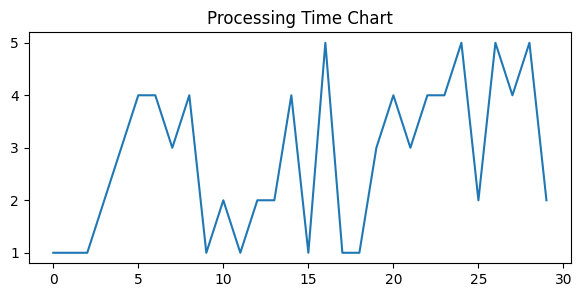

In [15]:
plt.figure(figsize=(7, 3))
df['p'].plot(title='Processing Time Chart')
plt.show()

Based on the chart above, we can see that after optimizing the job list, the processing times for each job tend to increase from the first job to the last job.

Next, let’s look at the job weight chart

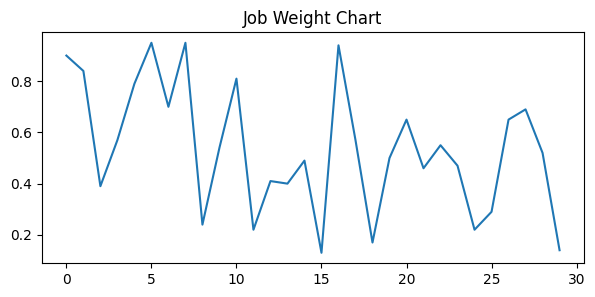

In [16]:
plt.figure(figsize=(7, 3))
df['w'].plot(title='Job Weight Chart')
plt.show()

From this chart, we can see that after optimizing the job list, the weights of each job tend to decrease from the first job to the last job.

From these insights, it is easy to observe that jobs with shorter processing times and higher priority weights are pushed to the top, while jobs with longer processing times and lower priorities are placed at the bottom.

# Scheduling for Design Production Using TiLearn

## Introduction to the Design Process

In the processing stage, studios often face the challenge of allocating resources and adjusting designs for multiple projects simultaneously. This is based on client priority, the complexity of each project, and external factors such as construction time. Applying scheduling techniques helps manage data more efficiently, plan better, and track progress while adjusting when necessary.

Typically, an interior design project goes through the following main stages:

- Concept development

- Space planning

- Design development

- Material selection

- Cost estimation

- Construction

- Installation

- Decoration

- Handover

Each phase needs to be completed before moving to the next. Therefore, the problem can be modeled as a scheduling problem with precedence constraints: $1|prec|\sum w_j C_j$, where tasks must follow priority and precedence rules.

Additionally, the studio may need to perform condition surveys for various projects, which do not require sequential completion. In this case, the problem can be modeled as $1||\sum w_j C_j$, where jobs can be completed in any order.